In [1]:
#import statements

#data frames
import pandas as pd
import numpy as np

#graphics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#machine learning
#for sklearn

In [2]:
#format pandas for reading
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', -1)

In [3]:
#read data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
feature_desc = pd.read_csv("feature_descriptions.csv")

train_labels = pd.read_csv("train_labels.csv")

In [4]:
#concate train_labels to train
train = pd.merge(train,
                 train_labels,
                 on = 'id')

In [5]:
#label data as test/train
train['dataType'] = 'train'
test['dataType'] = 'test'

In [6]:
trainTest = pd.concat([train,test], sort=True)

In [7]:
train.shape

(59400, 42)

In [8]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,dataType
0,69572,6000.0,3/14/11,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,train
1,8776,0.0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,train
2,34310,25.0,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,train
3,67743,0.0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,train
4,19728,0.0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,train


In [9]:
train.isnull().sum()

id                       0    
amount_tsh               0    
date_recorded            0    
funder                   3635 
gps_height               0    
installer                3655 
longitude                0    
latitude                 0    
wpt_name                 0    
num_private              0    
basin                    0    
subvillage               371  
region                   0    
region_code              0    
district_code            0    
lga                      0    
ward                     0    
population               0    
public_meeting           3334 
recorded_by              0    
scheme_management        3877 
scheme_name              28166
permit                   3056 
construction_year        0    
extraction_type          0    
extraction_type_group    0    
extraction_type_class    0    
management               0    
management_group         0    
payment                  0    
payment_type             0    
water_quality            0    
quality_

In [10]:
threshold5per = len(train)*.05

In [11]:
columns2Drop = train.columns[train.isnull().sum()>threshold5per]

In [12]:
columns2Drop

Index(['funder', 'installer', 'public_meeting', 'scheme_management',
       'scheme_name', 'permit'],
      dtype='object')

In [12]:
#drop from train, test, and master
#train.drop(labels = columns2Drop, inplace=True, axis =1)
#test.drop(labels = columns2Drop, inplace=True, axis =1)
#trainTest.drop(labels = columns2Drop, inplace=True, axis =1)

In [13]:
#drop id from train, test, and master
#train.drop(labels = 'id', inplace=True, axis =1)
#test.drop(labels = 'id', inplace=True, axis =1)
#trainTest.drop(labels = 'id', inplace=True, axis =1)

In [15]:
train.isnull().sum()
#subvillage is now the only thing missing data

id                       0    
amount_tsh               0    
date_recorded            0    
funder                   3635 
gps_height               0    
installer                3655 
longitude                0    
latitude                 0    
wpt_name                 0    
num_private              0    
basin                    0    
subvillage               371  
region                   0    
region_code              0    
district_code            0    
lga                      0    
ward                     0    
population               0    
public_meeting           3334 
recorded_by              0    
scheme_management        3877 
scheme_name              28166
permit                   3056 
construction_year        0    
extraction_type          0    
extraction_type_group    0    
extraction_type_class    0    
management               0    
management_group         0    
payment                  0    
payment_type             0    
water_quality            0    
quality_

In [17]:
cat_col = list(train.select_dtypes(include = ['object']).columns)
num_col = list(train.select_dtypes(exclude = ['object']).columns)

In [18]:
print(cat_col)

['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group', 'dataType']


In [19]:
print(train[cat_col].nunique())
print()
print(train[cat_col].nunique()>21)

#convert date_recorded into an actual date
#drop anything with more than 21 different categories
#drop recorded_by as only has 1 unique value

#needed to update my pandas on mac.  Now working.  

#LESSONS LEARNED
#if something works on one computer, and not the other, update the packates

date_recorded            356  
funder                   1897 
installer                2145 
wpt_name                 37400
basin                    9    
subvillage               19287
region                   21   
lga                      125  
ward                     2092 
public_meeting           2    
recorded_by              1    
scheme_management        12   
scheme_name              2696 
permit                   2    
extraction_type          18   
extraction_type_group    13   
extraction_type_class    7    
management               12   
management_group         5    
payment                  7    
payment_type             7    
water_quality            8    
quality_group            6    
quantity                 5    
quantity_group           5    
source                   10   
source_type              7    
source_class             3    
waterpoint_type          7    
waterpoint_type_group    6    
status_group             3    
dataType                 1    
dtype: i

In [20]:
columns2drop2 = ['wpt_name','subvillage','lga','ward','recorded_by','id']

In [21]:
#dropping additional features
#train.drop(columns2drop2, inplace=True, axis =1)
#test.drop(columns2drop2, inplace=True, axis =1)
#trainTest.drop(columns2drop2, inplace=True, axis =1)

In [22]:
cat_col = list(train.select_dtypes(include = ['object']).columns)
num_col = list(train.select_dtypes(exclude = ['object']).columns)

In [23]:
#convert string date to date time
train['date_recorded'] = pd.to_datetime(train['date_recorded'])
trainTest['date_recorded'] = pd.to_datetime(trainTest['date_recorded'])

In [24]:
#create columns to split out the data
train['year'] = pd.DatetimeIndex(train['date_recorded']).year
train['month'] = pd.DatetimeIndex(train['date_recorded']).month
train['day'] = pd.DatetimeIndex(train['date_recorded']).day

trainTest['year'] = pd.DatetimeIndex(trainTest['date_recorded']).year
trainTest['month'] = pd.DatetimeIndex(trainTest['date_recorded']).month
trainTest['day'] = pd.DatetimeIndex(trainTest['date_recorded']).day

In [25]:
print('Unique Years: {}'.format(train.year.nunique()))
print('Unique Months: {}'.format(train.month.nunique()))
print('Unique Days: {}'.format(train.day.nunique()))

Unique Years: 5
Unique Months: 12
Unique Days: 31


2011    28674
2013    24271
2012    6424 
2004    30   
2002    1    
Name: year, dtype: int64


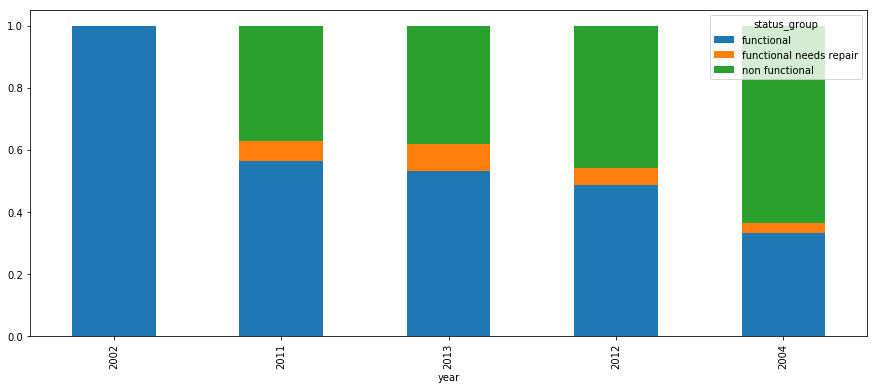

In [26]:
plt.rcParams['figure.figsize']=(15,6)

train.groupby('year').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

#how many counts did we have for 2002 and 2004?
print(train.year.value_counts())

#any data before 2011 may not be helpful.  Possible that the data is way less accurate

In [28]:
#pre2011 engineering
def pre2011(x):
    if x < 2011:
        return(1)
    else:
        return(0)

trainTest['pre2011'] = trainTest['year'].apply(pre2011)

trainTest.pre2011.value_counts()

0    74207
1    43   
Name: pre2011, dtype: int64

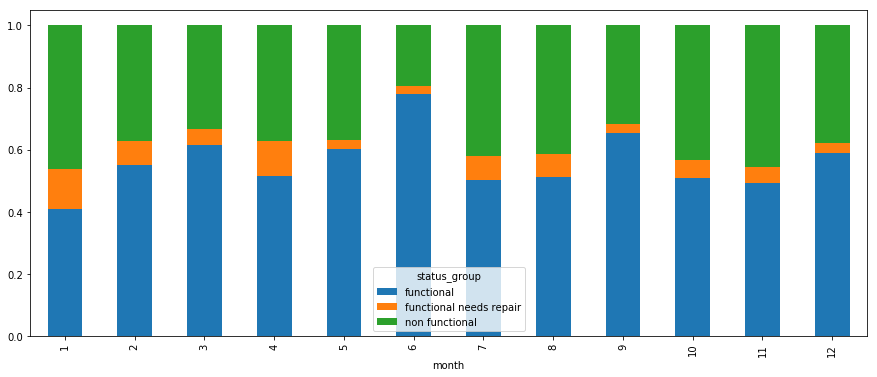

In [29]:
train.groupby('month').status_group.value_counts(
    normalize = True).unstack().plot(
    kind='bar',stacked = True)

#Observations

#June is by far the highest - feature engineering
#last month of the quarter is the best - feature engineering 

#hypothesis that non profits or NGOs have money they need to use at by the end of the quarter, so use it or lose it
#and spend on making wells

In [30]:
def quartermonth(x):
    if x % 3 == 0:
        return(3)
    if x % 3 == 2:
        return(2)
    if x % 3 == 1:
        return(1)        

In [31]:
train['quarterMonth'] = train['month'].apply(quartermonth)
trainTest['quarterMonth'] = trainTest['month'].apply(quartermonth)

In [32]:
num_col = list(train.select_dtypes(exclude = ['object']).columns)
print(num_col)

['id', 'amount_tsh', 'date_recorded', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'year', 'month', 'day', 'quarterMonth']


In [33]:
# ['amount_tsh','gps_height','longitude','latitude', 'num_private', 'region_code', 'district_code']
# ['population','construction_year', 'year', 'month', 'day', 'quarterMonth']

In [34]:
train.num_private.describe()

count    59400.000000
mean     0.474141    
std      12.236230   
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      1776.000000 
Name: num_private, dtype: float64

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


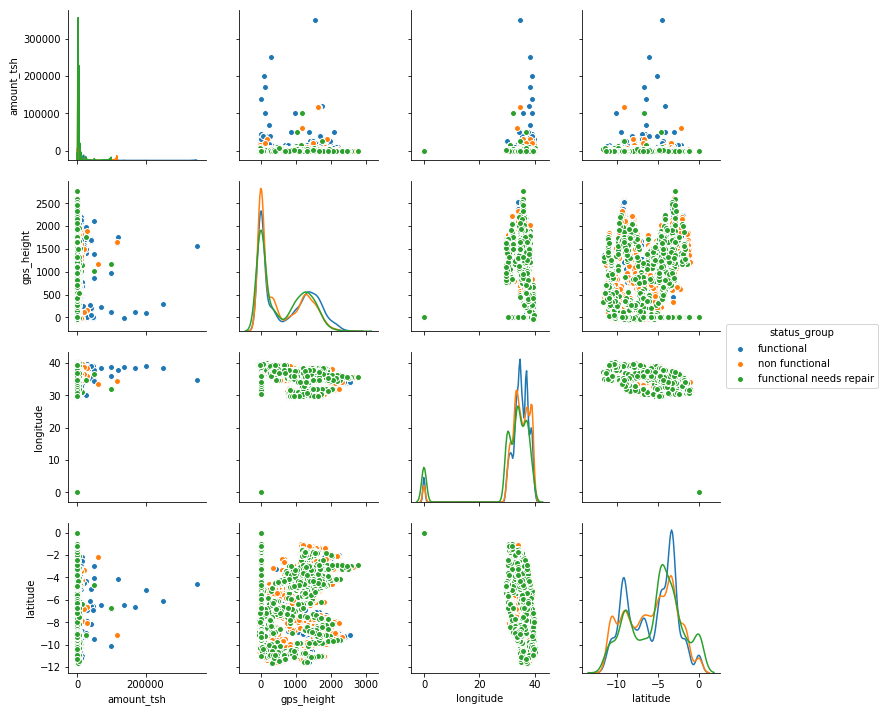

In [35]:
sns.pairplot(train[['amount_tsh','gps_height','longitude','latitude',
                    'status_group']], 
             hue = 'status_group',
            diag_kind = 'kde')
#things to clean

#clean the weird latitude and longitude
#lots of amount_tsh
#lots of 0 depth of the well

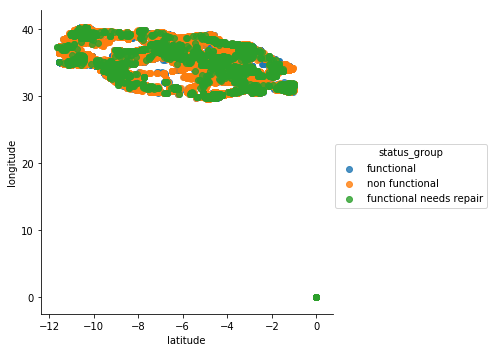

In [36]:
sns.lmplot(x = 'latitude', y = 'longitude', data = train, hue = 'status_group',fit_reg = False)
#need to get rid of the combo 0 latitude and 0 longitude

In [37]:
#explore which ones are missing values
print(train['basin'][train.latitude == -2.000000e-08].value_counts())
print()
print(train['basin'][train.longitude == 0].value_counts())

#only Lake Vic & Tang are missing values 

Lake Victoria      1713
Lake Tanganyika    99  
Name: basin, dtype: int64

Lake Victoria      1713
Lake Tanganyika    99  
Name: basin, dtype: int64


In [38]:
#Replace off values with NaNs
train.latitude.replace(to_replace = -2.000000e-08,value = np.nan,inplace = True)
train.longitude.replace(to_replace = 0,value = np.nan,inplace = True)

trainTest.latitude.replace(to_replace = -2.000000e-08,value = np.nan,inplace = True)
trainTest.longitude.replace(to_replace = 0,value = np.nan,inplace = True)

In [39]:
#explore which ones are missing values
print(test['basin'][test.latitude == -2.000000e-08].value_counts())
print()
print(test['basin'][test.longitude == 0].value_counts())

Lake Victoria      432
Lake Tanganyika    25 
Name: basin, dtype: int64

Lake Victoria      432
Lake Tanganyika    25 
Name: basin, dtype: int64


In [40]:
# replace the missing value 

#no longer need some of the manual calculations I did above
train['latitude'].fillna(train.groupby('basin')['latitude'].transform('mean'), inplace = True)
train['longitude'].fillna(train.groupby('basin')['longitude'].transform('mean'), inplace = True)

trainTest['latitude'].fillna(trainTest.groupby('basin')['latitude'].transform('mean'), inplace = True)
trainTest['longitude'].fillna(trainTest.groupby('basin')['longitude'].transform('mean'), inplace = True)

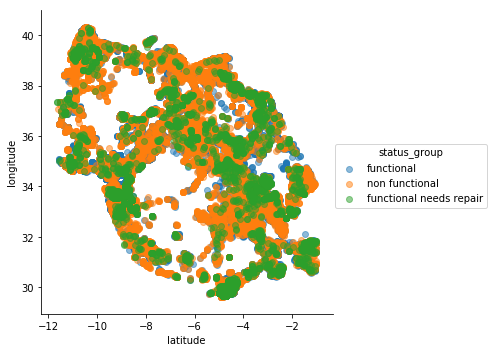

In [41]:
sns.lmplot(x = 'latitude', y = 'longitude', 
           data = train, hue = 'status_group',fit_reg = False, 
           scatter_kws={'alpha':0.5})

In [42]:
"""
Latitude is written before longitude. 
Latitude is written with a number, followed by either “north” or “south”
depending on whether it is located north or south of the equator. 

Longitude is written with a number, followed by either “east” or “west” 
depending on whether it is located east or west of the Prime Meridian.
"""

'\nLatitude is written before longitude. \nLatitude is written with a number, followed by either “north” or “south”\ndepending on whether it is located north or south of the equator. \n\nLongitude is written with a number, followed by either “east” or “west” \ndepending on whether it is located east or west of the Prime Meridian.\n'

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


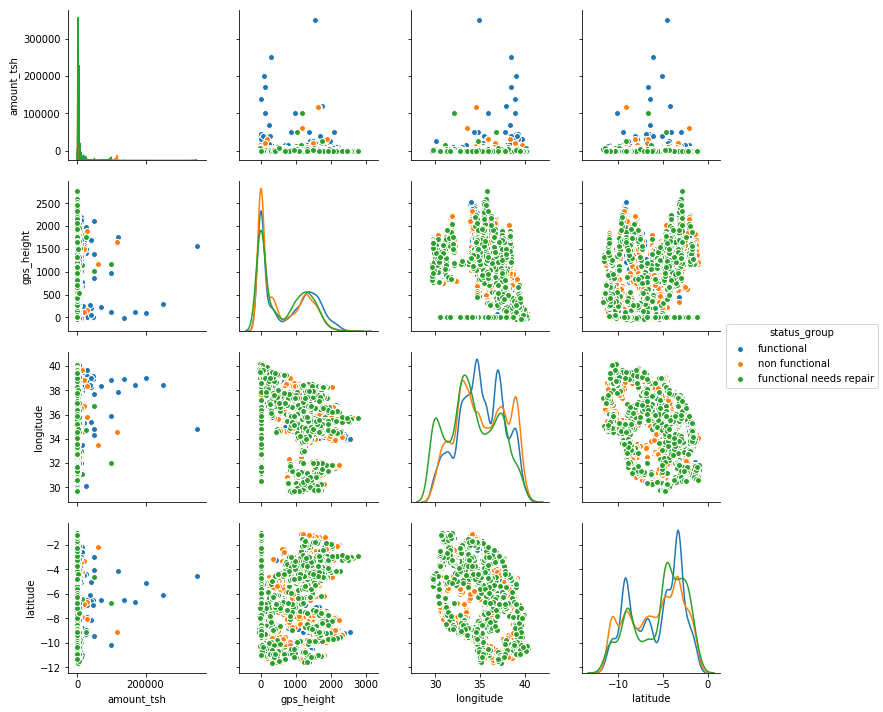

In [43]:
sns.pairplot(train[['amount_tsh','gps_height','longitude','latitude',
                    'status_group']], 
             hue = 'status_group',
            diag_kind = 'kde')

In [44]:
train['amount_tsh'].value_counts()
#drop amount_tsh, not convinced it should be 0 

0.00         41639
500.00       3102 
50.00        2472 
1000.00      1488 
20.00        1463 
200.00       1220 
100.00       816  
10.00        806  
30.00        743  
2000.00      704  
250.00       569  
300.00       557  
5000.00      450  
5.00         376  
25.00        356  
3000.00      334  
1200.00      267  
1500.00      197  
6.00         190  
600.00       176  
4000.00      156  
2400.00      145  
2500.00      139  
6000.00      125  
7.00         69   
8000.00      61   
750.00       59   
40.00        59   
10000.00     57   
12000.00     51   
             ..   
16000.00     2    
16300.00     2    
800.00       2    
11000.00     2    
590.00       2    
520.00       2    
26000.00     2    
13000.00     2    
9.00         1    
170000.00    1    
200000.00    1    
900.00       1    
0.25         1    
53.00        1    
350000.00    1    
306.00       1    
120000.00    1    
26.00        1    
59.00        1    
60000.00     1    
5400.00      1    
70000.00    

In [45]:
train['gps_height'].value_counts()
#going to drop this as well

 0       20438
-15      60   
-16      55   
-13      55   
-20      52   
 1290    52   
-14      51   
 303     51   
-18      49   
-19      47   
 1269    46   
 1295    46   
 1304    45   
-23      45   
 280     44   
 1538    44   
 1286    44   
-8       44   
-17      44   
 1332    43   
 320     43   
 1317    42   
 1293    42   
 1319    42   
 1359    42   
 1264    42   
 1288    42   
 1401    42   
 1303    42   
-27      42   
         ..   
 2506    1    
 2023    1    
-53      1    
 2364    1    
 2332    1    
 2402    1    
 2236    1    
 2420    1    
 2291    1    
 2407    1    
 2080    1    
 2250    1    
 591     1    
 2378    1    
 2535    1    
 2614    1    
 2484    1    
 2450    1    
 2072    1    
 2286    1    
 2567    1    
 2322    1    
 2254    1    
 2264    1    
 2464    1    
 2285    1    
 2424    1    
 2552    1    
 2413    1    
 2385    1    
Name: gps_height, Length: 2428, dtype: int64

In [46]:
columns2drop3 = ['amount_tsh','gps_height']

In [64]:
#train.drop(columns2drop3, inplace=True, axis =1)
#trainTest.drop(columns2drop3, inplace=True, axis =1)

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


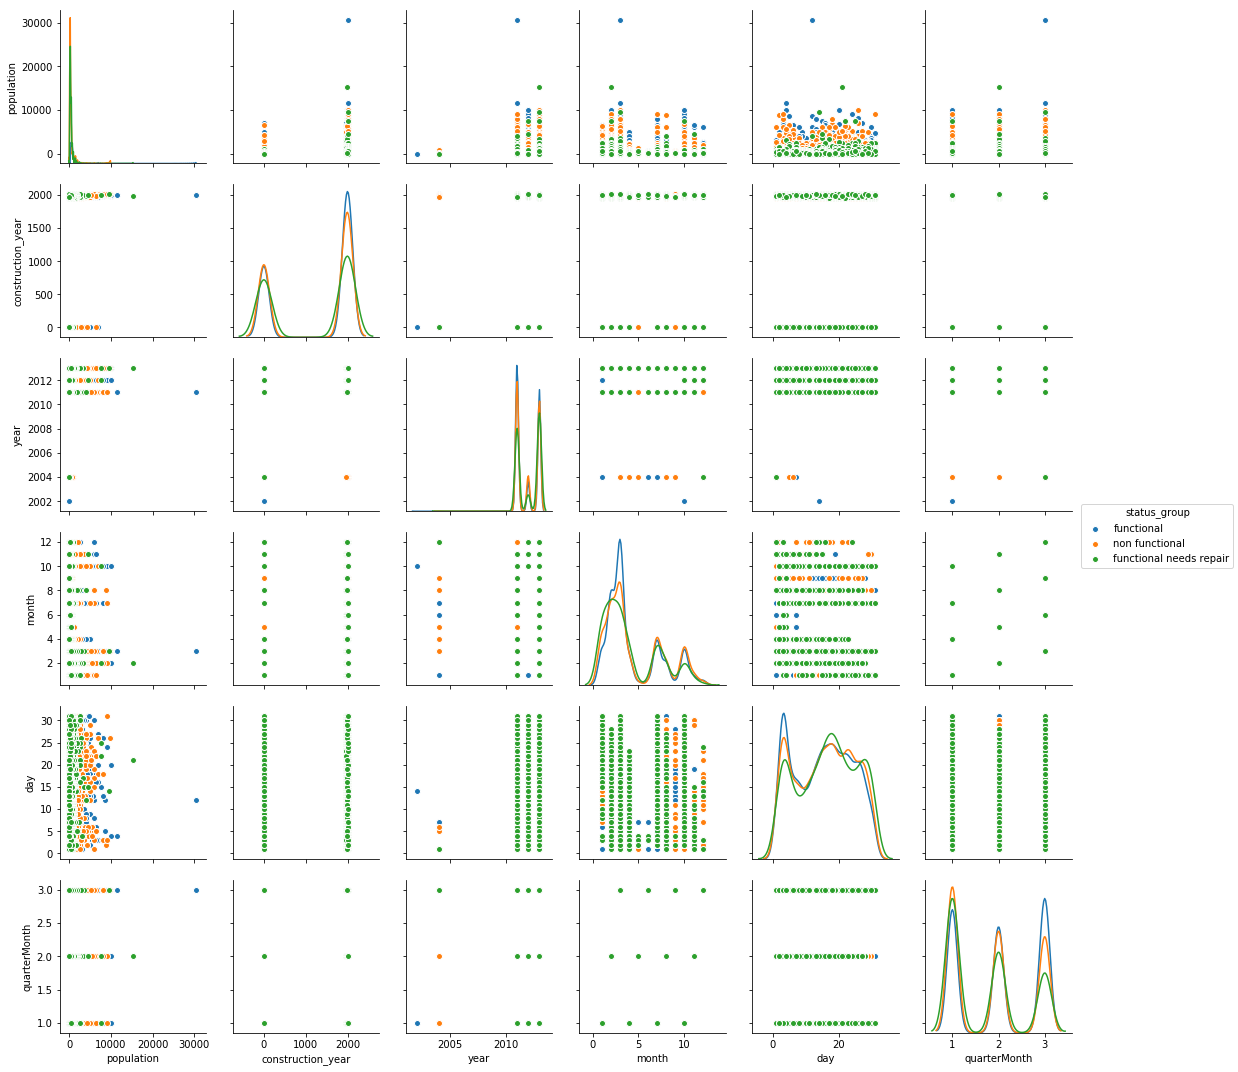

In [47]:
sns.pairplot(train[['population','construction_year', 'year', 'month', 'day', 'quarterMonth',
                    'status_group']], 
             hue = 'status_group',
            diag_kind = 'kde')
#given these discrete values, not super helpful

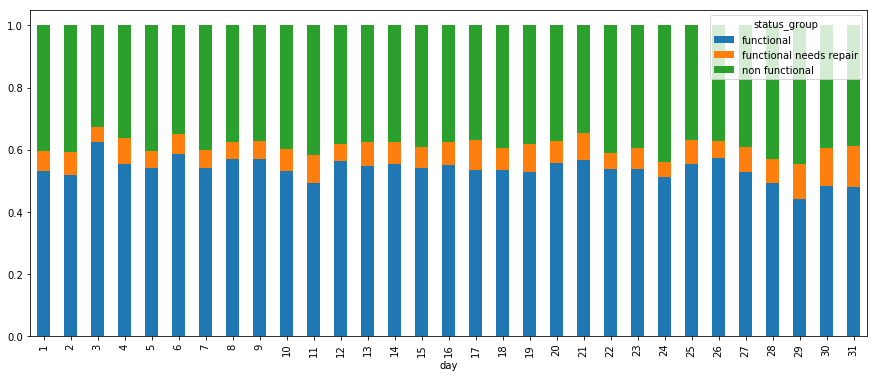

In [48]:
train.groupby('day').status_group.value_counts(
    normalize = True).unstack().plot(
    kind='bar',stacked = True)

#observations

In [49]:
train[cat_col].columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'dataType'],
      dtype='object')

In [50]:
train.status_group.value_counts(normalize = True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

Need to look at a differnet feature groups to see if they are the same or if they have any differences

extraction_type, extraction_type_group, extraction_type_group
management, management_group
payment, payment_type
water_quality, quality_group
quantity, quantity_group
source, source_type, source_group
waterpoint_type, waterpoint_group

In [51]:
train.groupby('basin').status_group.value_counts(
    normalize = True).unstack().sort_values('functional',ascending=False)

status_group,functional,functional needs repair,non functional
basin,,,
Lake Nyasa,0.653687,0.049164,0.297148
Rufiji,0.635406,0.054789,0.309804
Pangani,0.600895,0.053356,0.345749
Internal,0.575723,0.071548,0.352730
Wami / Ruvu,0.523802,0.044931,0.431268
Lake Victoria,0.497658,0.096507,0.405835
Lake Tanganyika,0.483053,0.115361,0.401586
Lake Rukwa,0.407498,0.110024,0.482478
Ruvuma / Southern Coast,0.371689,0.072557,0.555753


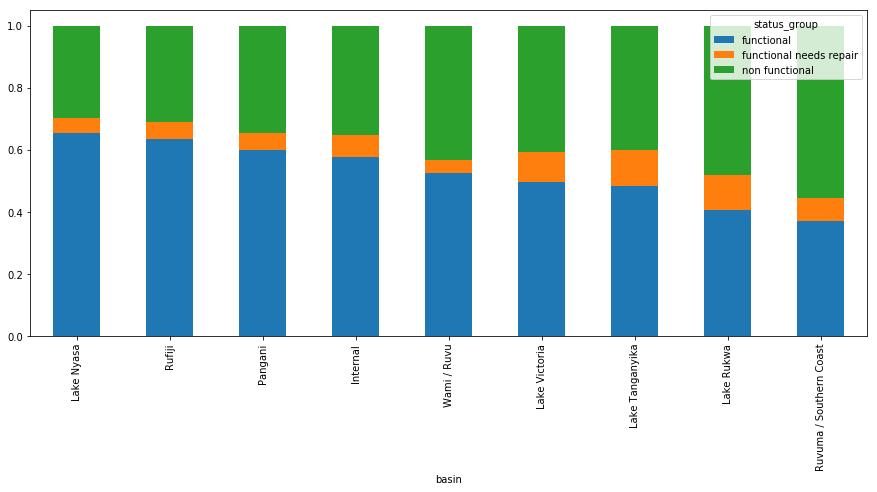

In [52]:
plt.rcParams['figure.figsize']=(15,6)

train.groupby('basin').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

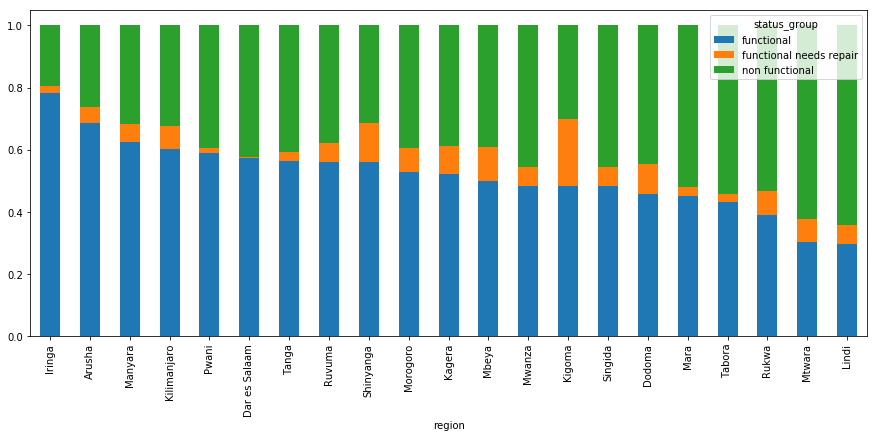

In [53]:
#region
train.groupby('region').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [54]:
train[['extraction_type','extraction_type_group','extraction_type_class']].nunique()

extraction_type          18
extraction_type_group    13
extraction_type_class    7 
dtype: int64

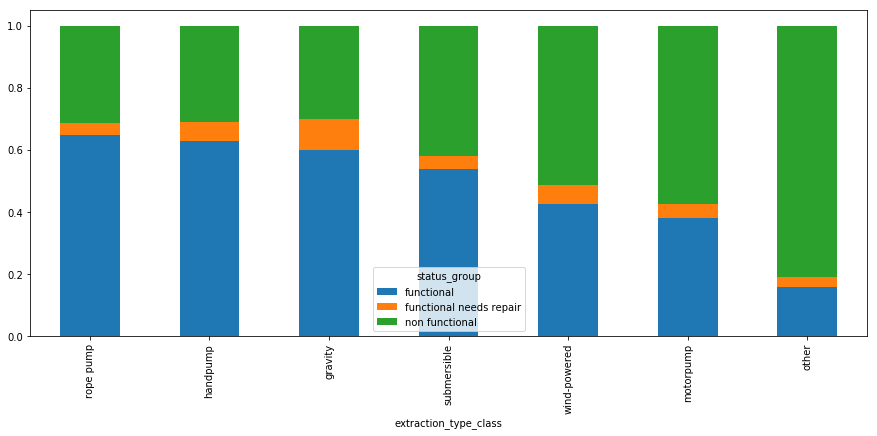

In [55]:
train.groupby('extraction_type_class').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [56]:
#otherExtractionType
def otherExtractionType(x):
    if x == 'other':
        return(1)
    else:
        return(0)

trainTest['otherExtractionType'] = trainTest['extraction_type_class'].apply(otherExtractionType)
trainTest['otherExtractionType'].value_counts()

0    66148
1    8102 
Name: otherExtractionType, dtype: int64

In [57]:
train[['management','management_group']].nunique()

management          12
management_group    5 
dtype: int64

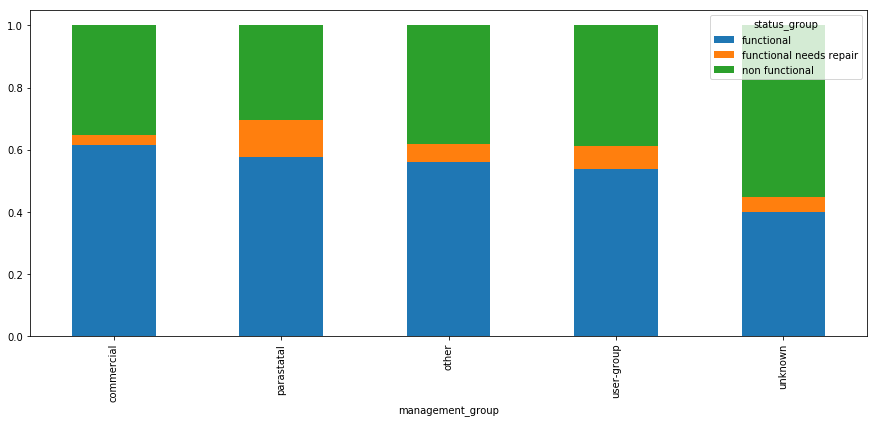

In [58]:
#managment_group
train.groupby('management_group').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [59]:
#unknownManagmentGroup
def unknownManagmentGroup(x):
    if x == 'unknown':
        return(1)
    else:
        return(0)

trainTest['unknownManagmentGroup'] = trainTest['management_group'].apply(unknownManagmentGroup)
trainTest['unknownManagmentGroup'].value_counts()

0    73567
1    683  
Name: unknownManagmentGroup, dtype: int64

In [60]:
train[['payment','payment_type']].nunique()

payment         7
payment_type    7
dtype: int64

In [61]:
print(train.payment.value_counts())
print()
print(train.payment_type.value_counts())

never pay                25348
pay per bucket           8985 
pay monthly              8300 
unknown                  8157 
pay when scheme fails    3914 
pay annually             3642 
other                    1054 
Name: payment, dtype: int64

never pay     25348
per bucket    8985 
monthly       8300 
unknown       8157 
on failure    3914 
annually      3642 
other         1054 
Name: payment_type, dtype: int64


In [62]:
#strongly suspect that payment and payment_type are exactly the same
#and can drop one

poc = train[['payment','payment_type']].copy()

#never pay - confirmed
#pay per buckect - confirmed
#pay monthly - confirmed
#unknown - confirmed
#pay when scheme fails - confirmed
#pay annually - confirmed
#other - confirmed

poc[poc['payment']=='other']


,payment,payment_type
12,other,other
73,other,other
96,other,other
106,other,other
107,other,other
123,other,other
158,other,other
168,other,other
287,other,other
334,other,other


In [85]:
#drop payment feature as exacply the same as payment_type
#train.drop(labels = 'payment', inplace=True, axis =1)
#test.drop(labels = 'payment', inplace=True, axis =1)
#trainTest.drop(labels = 'payment', inplace=True, axis =1)

In [63]:
columns2drop4 = ['id','payment']

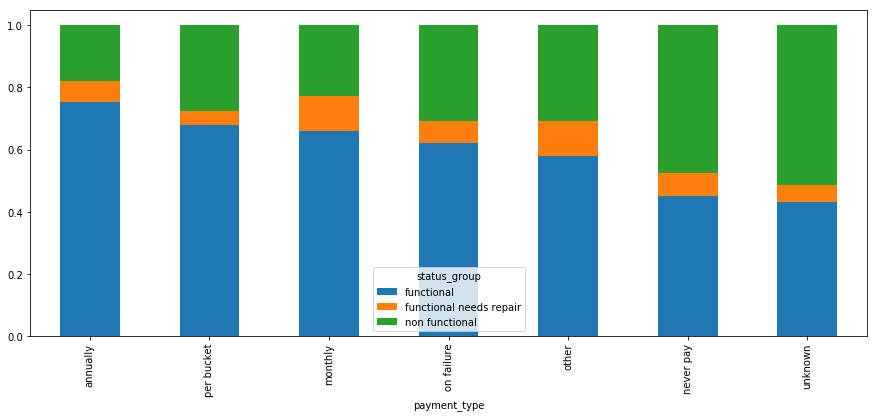

In [64]:
#payment_type
train.groupby('payment_type').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [65]:
#unknownPaymentType
def unknownNeverPaymentType(x):
    if x == ('unknown') or (x == 'never pay'):
        return(1)
    else:
        return(0)

trainTest['unknownNeverPaymentType'] = trainTest['payment_type'].apply(unknownNeverPaymentType)
trainTest['unknownNeverPaymentType'].value_counts()

1    41861
0    32389
Name: unknownNeverPaymentType, dtype: int64

In [66]:
train[['water_quality','quantity_group']].nunique()

water_quality     8
quantity_group    5
dtype: int64

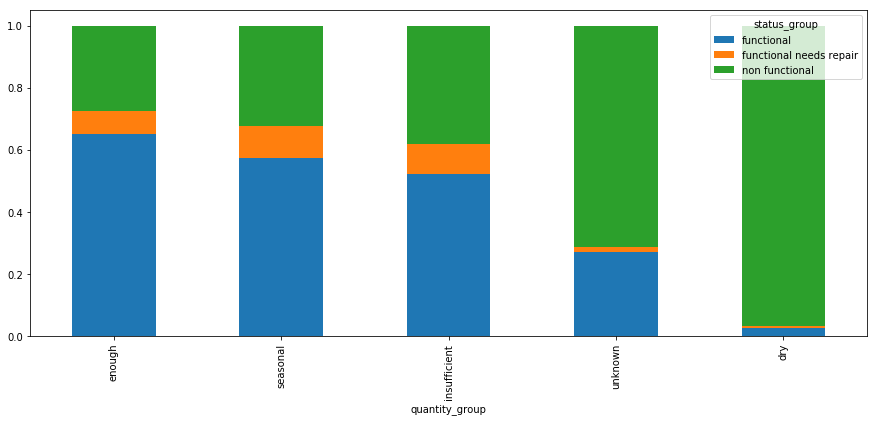

In [67]:
#quanity_group
train.groupby('quantity_group').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [68]:
#dryQuantityGroup
def dryQuantityGroup(x):
    if x == 'dry':
        return(1)
    else:
        return(0)

trainTest['dryQuantityGroup'] = trainTest['quantity_group'].apply(dryQuantityGroup)

#unknownQuantityGroup
def unknownQuantityGroup(x):
    if x == 'unknown':
        return(1)
    else:
        return(0)

trainTest['unknownQuantityGroup'] = trainTest['quantity_group'].apply(unknownQuantityGroup)



print(trainTest['dryQuantityGroup'].value_counts())
print(trainTest['unknownQuantityGroup'].value_counts())


0    66468
1    7782 
Name: dryQuantityGroup, dtype: int64
0    73275
1    975  
Name: unknownQuantityGroup, dtype: int64


In [69]:
train[['source','source_type','source_class']].nunique()

source          10
source_type     7 
source_class    3 
dtype: int64

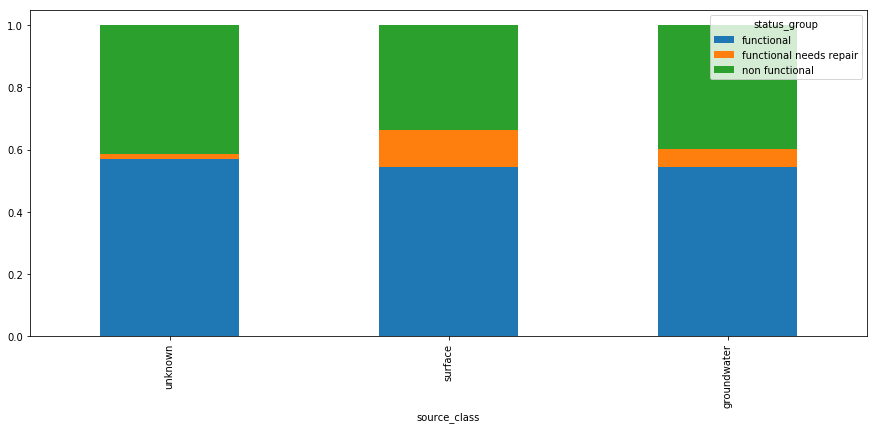

In [70]:
#source_class
train.groupby('source_class').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [71]:
train[['waterpoint_type','waterpoint_type_group']].nunique()

waterpoint_type          7
waterpoint_type_group    6
dtype: int64

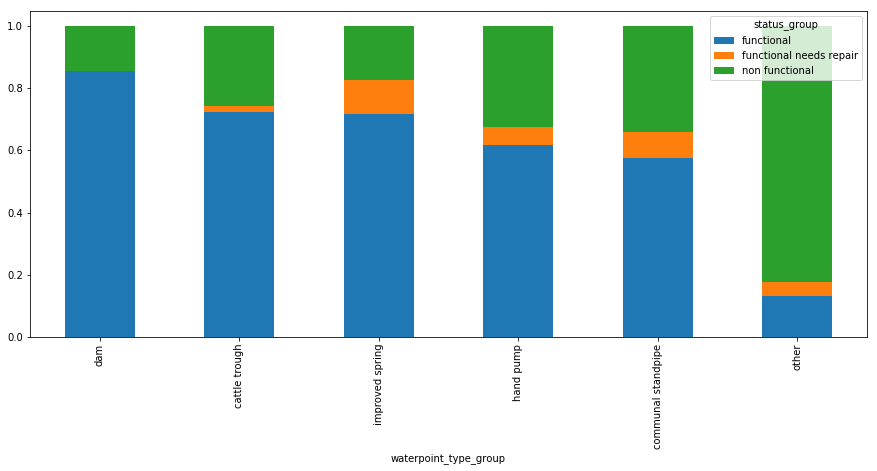

In [72]:
#water_type_group
train.groupby('waterpoint_type_group').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [73]:
#otherWaterType
def otherWaterType(x):
    if x == 'other':
        return(1)
    else:
        return(0)

trainTest['otherWaterType'] = trainTest['waterpoint_type_group'].apply(otherWaterType)
print(trainTest['otherWaterType'].value_counts())

0    66240
1    8010 
Name: otherWaterType, dtype: int64


In [74]:
trainTest.head()

,amount_tsh,basin,construction_year,dataType,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,funder,gps_height,id,installer,latitude,lga,longitude,management,management_group,num_private,payment,payment_type,permit,population,public_meeting,quality_group,quantity,quantity_group,recorded_by,region,region_code,scheme_management,scheme_name,source,source_class,source_type,status_group,subvillage,ward,water_quality,waterpoint_type,waterpoint_type_group,wpt_name,year,month,day,pre2011,quarterMonth,otherExtractionType,unknownManagmentGroup,unknownNeverPaymentType,dryQuantityGroup,unknownQuantityGroup,otherWaterType
0,6000.0,Lake Nyasa,1999,train,2011-03-14,5,gravity,gravity,gravity,Roman,1390,69572,Roman,-9.856322,Ludewa,34.938093,vwc,user-group,0,pay annually,annually,False,109,True,good,enough,enough,GeoData Consultants Ltd,Iringa,11,VWC,Roman,spring,groundwater,spring,functional,Mnyusi B,Mundindi,soft,communal standpipe,communal standpipe,none,2011,3,14,0,3,0,0,0,0,0,0
1,0.0,Lake Victoria,2010,train,2013-03-06,2,gravity,gravity,gravity,Grumeti,1399,8776,GRUMETI,-2.147466,Serengeti,34.698766,wug,user-group,0,never pay,never pay,True,280,NaN,good,insufficient,insufficient,GeoData Consultants Ltd,Mara,20,Other,NaN,rainwater harvesting,surface,rainwater harvesting,functional,Nyamara,Natta,soft,communal standpipe,communal standpipe,Zahanati,2013,3,6,0,3,0,0,1,0,0,0
2,25.0,Pangani,2009,train,2013-02-25,4,gravity,gravity,gravity,Lottery Club,686,34310,World vision,-3.821329,Simanjiro,37.460664,vwc,user-group,0,pay per bucket,per bucket,True,250,True,good,enough,enough,GeoData Consultants Ltd,Manyara,21,VWC,Nyumba ya mungu pipe scheme,dam,surface,dam,functional,Majengo,Ngorika,soft,communal standpipe multiple,communal standpipe,Kwa Mahundi,2013,2,25,0,2,0,0,0,0,0,0
3,0.0,Ruvuma / Southern Coast,1986,train,2013-01-28,63,submersible,submersible,submersible,Unicef,263,67743,UNICEF,-11.155298,Nanyumbu,38.486161,vwc,user-group,0,never pay,never pay,True,58,True,good,dry,dry,GeoData Consultants Ltd,Mtwara,90,VWC,NaN,machine dbh,groundwater,borehole,non functional,Mahakamani,Nanyumbu,soft,communal standpipe multiple,communal standpipe,Zahanati Ya Nanyumbu,2013,1,28,0,1,0,0,1,1,0,0
4,0.0,Lake Victoria,0,train,2011-07-13,1,gravity,gravity,gravity,Action In A,0,19728,Artisan,-1.825359,Karagwe,31.130847,other,other,0,never pay,never pay,True,0,True,good,seasonal,seasonal,GeoData Consultants Ltd,Kagera,18,NaN,NaN,rainwater harvesting,surface,rainwater harvesting,functional,Kyanyamisa,Nyakasimbi,soft,communal standpipe,communal standpipe,Shuleni,2011,7,13,0,1,0,0,1,0,0,0


In [75]:
print(columns2Drop)
print(columns2drop2)
print(columns2drop3)
print(columns2drop4)

Index(['funder', 'installer', 'public_meeting', 'scheme_management',
       'scheme_name', 'permit'],
      dtype='object')
['wpt_name', 'subvillage', 'lga', 'ward', 'recorded_by', 'id']
['amount_tsh', 'gps_height']
['id', 'payment']


In [83]:
columns2drop = list(columns2Drop)

In [85]:
columns2dropMaster = (columns2drop + columns2drop2 + columns2drop3 + columns2drop4)

In [86]:
columns2dropMaster

['funder',
 'installer',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit',
 'wpt_name',
 'subvillage',
 'lga',
 'ward',
 'recorded_by',
 'id',
 'amount_tsh',
 'gps_height',
 'id',
 'payment']

In [87]:
trainTest.drop(labels = columns2dropMaster, inplace=True, axis =1)

In [ ]:
#traincleaned = 
trainTest